In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
df = pd.read_csv('classified_data.csv')
#df1 = pd.read_csv('classified_data.csv')

In [3]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [4]:
df.shape

(30000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [6]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [7]:
df.drop(['Customer ID','Name','Property ID'],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


## Removing NaN values

<AxesSubplot:>

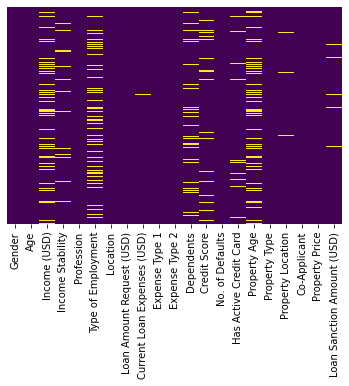

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Gender', ylabel='count'>

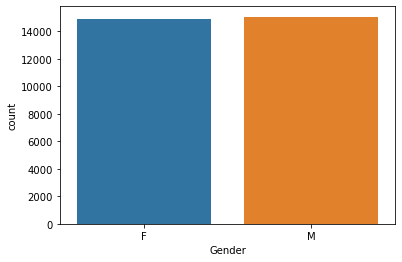

In [10]:
sns.countplot(x='Gender',data=df)

In [11]:
df['Gender'].value_counts()

M    15053
F    14894
Name: Gender, dtype: int64

In [12]:
#filling null with mode of gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [13]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [14]:
#filling null with mode of Property Age
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].mode()[0])

In [15]:
df.head(10)

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,1608.43,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28
5,F,60,1234.92,Low,State servant,Secretaries,Rural,34434.72,181.48,N,...,2.0,684.12,1,Inactive,1234.92,2,Rural,1,43146.82,22382.57
6,M,43,2361.56,Low,Working,Laborers,Semi-Urban,152561.34,697.67,Y,...,2.0,637.29,0,Unpossessed,2361.56,1,Semi-Urban,1,221050.80,0.00
7,F,45,NaN,Low,State servant,Managers,Semi-Urban,240311.77,807.64,N,...,2.0,812.26,0,Active,1608.43,2,Urban,1,401040.70,168218.24
8,F,38,1296.07,Low,Working,Cooking staff,Rural,35141.99,155.95,N,...,3.0,705.29,1,Active,1296.07,4,Rural,1,54903.44,22842.29
9,M,18,1546.17,Low,Working,Laborers,Rural,42091.29,500.20,N,...,2.0,613.24,0,Unpossessed,1546.17,2,Urban,1,67993.43,0.00


<AxesSubplot:xlabel='Has Active Credit Card', ylabel='count'>

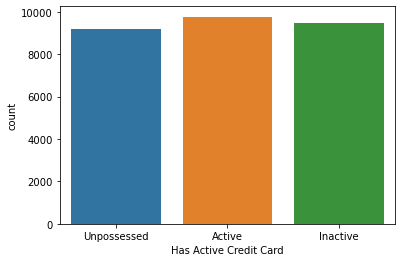

In [16]:
sns.countplot(x='Has Active Credit Card',data=df)

In [17]:
#filling null with mode of Has Active Credit Card
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode()[0])

<AxesSubplot:xlabel='Dependents', ylabel='Age'>

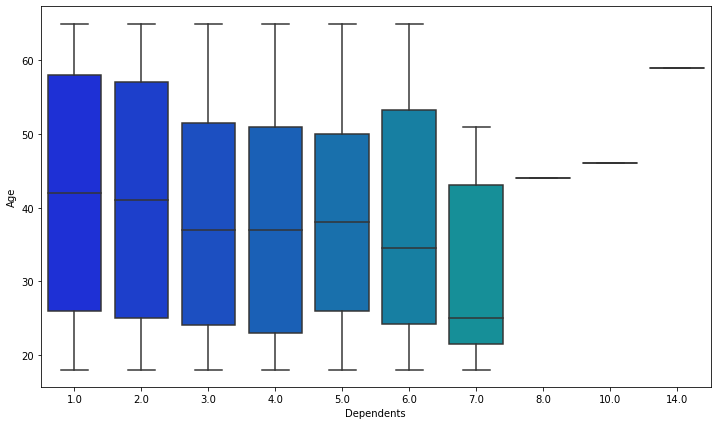

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Dependents',y='Age',data=df,palette='winter')

In [19]:
#filling null with mode of Dependents
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [20]:
#filling null of Income Stability using Profesion
df['Profession'].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [21]:
df['Income Stability'].unique()

array(['Low', 'High', nan], dtype=object)

In [22]:
def income_stab(x):
    if x=='Pensioner' or 'Unemployed':return 'High'
    else:return 'Low'

In [23]:
df['Income Stability']=df['Income Stability'].fillna(df['Profession'].apply(income_stab))

In [24]:
df['Credit Score'].min()

580.0

In [25]:
df['Credit Score'].mode()[0]

792.76

In [26]:
#filling null values of Credit Score with mode of itself
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mode()[0])

In [27]:
df.isnull().sum()

Gender                            0
Age                               0
Income (USD)                   4576
Income Stability                  0
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property Age                      0
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [28]:
df.shape

(30000, 21)

In [29]:
def loan_pred(x):
    if x==0 or x==np.nan:
        return 0
    else: return 1

In [30]:
#filling null and other data with descrete unitsf
df['Loan Sanction Amount (USD)']=df['Loan Sanction Amount (USD)'].apply(loan_pred)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='count'>

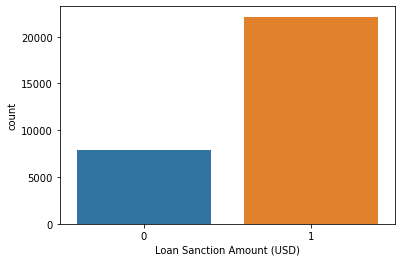

In [31]:
sns.countplot(x='Loan Sanction Amount (USD)',data=df)

<AxesSubplot:xlabel='Property Location', ylabel='count'>

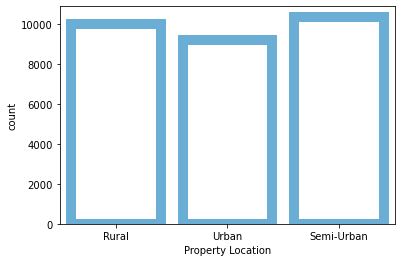

In [32]:
sns.countplot(x='Property Location',facecolor = (0,0,0,0),data=df,linewidth=10,edgecolor=sns.color_palette("Blues", 1))

In [33]:
#filling null values of Property Location with mode of itself
df['Property Location']=df['Property Location'].fillna(df['Property Location'].mode()[0])

In [34]:
df['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban'], dtype=object)

In [35]:
#filling null values of Type of Employment with mode of itself
df['Type of Employment']=df['Type of Employment'].fillna(df['Type of Employment'].mode()[0])

In [36]:
#filling null values of Current Loan Expenses with mean of itself
df['Current Loan Expenses (USD)']=df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].mean())

In [37]:
work = df.loc[df['Profession']=='Working',['Income (USD)']].mean()[0]
pensioner = df.loc[df['Profession']=='Pensioner',['Income (USD)']].mean()[0]
state_serv = df.loc[df['Profession']=='State servant',['Income (USD)']].mean()[0]
comm_asso = df.loc[df['Profession']=='Commercial associate',['Income (USD)']].mean()[0]
unemp = df.loc[df['Profession']=='Unemployed',['Income (USD)']].mean()[0]
stud = df.loc[df['Profession']=='Student',['Income (USD)']].mean()[0]
buss = df.loc[df['Profession']=='Businessman',['Income (USD)']].mean()[0]
mater = df.loc[df['Profession']=='Maternity leave',['Income (USD)']].mean()[0]

def fill_income(x):
    if(x=='Working'):
        return (work)
    if(x=='Pensioner'):
        return (pensioner)
    if(x=='State servant'):
        return (state_serv)
    if(x=='Commercial associate'):
        return (comm_asso)
    if(x=='Unemployed'):
        return (unemp)
    if(x=='Student'):
        return (stud)
    if(x=='Businessman'):
        return (buss)
    if(x=='Maternity leave'):
        return (mater)
    

In [38]:
prof_labels=[x for x in df['Profession'].unique()]

In [39]:
prof_labels

['Working',
 'Pensioner',
 'State servant',
 'Commercial associate',
 'Unemployed',
 'Student',
 'Businessman',
 'Maternity leave']

([<matplotlib.patches.Wedge at 0x1fd9ed17580>,
 [Text(-0.22074031048453785, 1.077624106693605, 'Working'),
  Text(-0.35931930265994233, -1.0396584240681999, 'Pensioner'),
  Text(0.7799735069570076, -0.7756554186268455, 'State servant'),
  Text(1.0663953886366435, -0.2698163729177717, 'Commercial associate')])

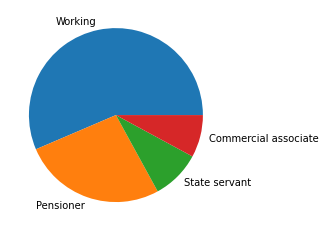

In [40]:
plt.pie(df['Profession'].value_counts()[:4],labels=prof_labels[:4])

In [41]:
df['Profession'].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

In [42]:
#filling null values of Profession according  with mode of itself
df.loc[df['Profession']=='Working',['Income (USD)']].mean()[0]

2537.3440332568093

In [43]:
#filling null values of Income according to their profession using above function
df['Income (USD)']=df['Income (USD)'].fillna(df['Profession'].apply(fill_income))

In [44]:
df['Income (USD)'].isnull().value_counts()

False    29999
True         1
Name: Income (USD), dtype: int64

In [45]:
mater

nan

In [46]:
df['Profession'].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Student                     1
Maternity leave             1
Name: Profession, dtype: int64

In [47]:
df.loc[df['Income (USD)'].isnull()]

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
22344,F,62,NaN,Low,Maternity leave,Laborers,Urban,108967.56,1092.04,N,...,2.0,878.49,0,Active,1608.43,3,Semi-Urban,1,199761.32,1


In [48]:
df['Income (USD)'].isnull().value_counts()

False    29999
True         1
Name: Income (USD), dtype: int64

In [49]:
df.at[22344,'Income (USD)']=0

In [50]:
df.iloc[22344]

Gender                                       F
Age                                         62
Income (USD)                               0.0
Income Stability                           Low
Profession                     Maternity leave
Type of Employment                    Laborers
Location                                 Urban
Loan Amount Request (USD)            108967.56
Current Loan Expenses (USD)            1092.04
Expense Type 1                               N
Expense Type 2                               N
Dependents                                 2.0
Credit Score                            878.49
No. of Defaults                              0
Has Active Credit Card                  Active
Property Age                           1608.43
Property Type                                3
Property Location                   Semi-Urban
Co-Applicant                                 1
Property Price                       199761.32
Loan Sanction Amount (USD)                   1
Name: 22344, 

In [51]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

## Coverting datatypes

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Type of Employment           30000 non-null  object 
 6   Location                     30000 non-null  object 
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  30000 non-null  float64
 9   Expense Type 1               30000 non-null  object 
 10  Expense Type 2               30000 non-null  object 
 11  Dependents                   30000 non-null  float64
 12  Credit Score                 30000 non-null  float64
 13  No. of Defaults 

### converting gender to int form

In [53]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

### converting Income Stability

In [54]:
df['Income Stability'].unique()

array(['Low', 'High'], dtype=object)

In [55]:
df['Income Stability'] = df['Income Stability'].map({'Low':0,'High':1})

### converting Profession

In [56]:
df['Profession'].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [57]:
prof_dict={'Working':0, 'Pensioner':1, 'State servant':2, 'Commercial associate':3,'Unemployed':4,
           'Student':5, 'Businessman':6, 'Maternity leave':7}

In [58]:
df['Profession']=df['Profession'].map(prof_dict)

### converting Type of Employment

In [59]:
df['Type of Employment'].unique()

array(['Sales staff', 'Laborers', 'High skill tech staff', 'Secretaries',
       'Managers', 'Cooking staff', 'Core staff', 'Drivers',
       'Realty agents', 'Security staff', 'Accountants',
       'Private service staff', 'Waiters/barmen staff', 'Medicine staff',
       'Cleaning staff', 'Low-skill Laborers', 'HR staff', 'IT staff'],
      dtype=object)

In [60]:
df['Type of Employment'].value_counts()

Laborers                 12848
Sales staff               3736
Core staff                3230
Managers                  2495
Drivers                   1606
Accountants               1379
High skill tech staff     1307
Medicine staff             864
Security staff             579
Cooking staff              566
Private service staff      342
Cleaning staff             341
Low-skill Laborers         162
Secretaries                161
Waiters/barmen staff       149
Realty agents               86
IT staff                    77
HR staff                    72
Name: Type of Employment, dtype: int64

In [61]:
type_emp_dict = {'Sales staff':0, 'Laborers':1, 'High skill tech staff':2, 'Secretaries':3,'Managers':4, 'Cooking staff':5,
                 'Core staff':6, 'Drivers':7, 'Realty agents':8, 'Security staff':9, 'Accountants':10,'Private service staff':11,
                 'Waiters/barmen staff':12, 'Medicine staff':13,'Cleaning staff':14, 'Low-skill Laborers':15, 'HR staff':16, 
                 'IT staff':17}

In [62]:
df['Type of Employment']=df['Type of Employment'].map(type_emp_dict)

In [63]:
df['Location'].value_counts()

Semi-Urban    21563
Rural          5338
Urban          3099
Name: Location, dtype: int64

In [64]:
df.drop(['Location','Expense Type 1','Expense Type 2'],inplace=True,axis=1)

### Converting Credit card details

In [65]:
df['Has Active Credit Card'].unique()

array(['Active', 'Unpossessed', 'Inactive'], dtype=object)

In [66]:
df['Has Active Credit Card'].value_counts()

Active         11337
Inactive        9466
Unpossessed     9197
Name: Has Active Credit Card, dtype: int64

In [67]:
cred_card_dict={'Active':0, 'Unpossessed':2, 'Inactive':3}

In [68]:
df['Has Active Credit Card'] = df['Has Active Credit Card'].map(cred_card_dict)

### Converting Location of property

In [69]:
df['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban'], dtype=object)

In [70]:
prop_loc_dict = {'Rural':0, 'Urban':1, 'Semi-Urban':2}

In [71]:
df['Property Location'] = df['Property Location'].map(prop_loc_dict)

## Cleaned data

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  int64  
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  int64  
 4   Profession                   30000 non-null  int64  
 5   Type of Employment           30000 non-null  int64  
 6   Loan Amount Request (USD)    30000 non-null  float64
 7   Current Loan Expenses (USD)  30000 non-null  float64
 8   Dependents                   30000 non-null  float64
 9   Credit Score                 30000 non-null  float64
 10  No. of Defaults              30000 non-null  int64  
 11  Has Active Credit Card       30000 non-null  int64  
 12  Property Age                 30000 non-null  float64
 13  Property Type   

# Implementing ML  



In [73]:
x=df.iloc[:,:17]
y=df.loc[:,'Loan Sanction Amount (USD)']

In [74]:
x.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0,56,1933.050000,0,0,0,72809.58,241.08,3.0,809.44,0,0,1933.05,4,0,1,119933.46
1,1,32,4952.910000,0,0,1,46837.47,495.81,1.0,780.40,0,2,4952.91,2,0,1,54791.00
2,0,65,988.190000,1,1,1,45593.04,171.95,1.0,833.15,0,2,988.19,2,1,0,72440.58
3,0,65,2152.994227,1,1,1,80057.92,298.54,2.0,832.70,1,2,1608.43,2,2,1,121441.51
4,0,31,2614.770000,0,0,2,113858.89,491.41,2.0,745.55,1,0,2614.77,4,2,1,208567.91


In [75]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Loan Sanction Amount (USD), dtype: int64

In [76]:
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, 
                                                    random_state=100)

In [77]:
type(y_test)

pandas.core.series.Series

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression


In [79]:
logmodel = LogisticRegression(solver='liblinear', random_state=0)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [80]:
predictions = logmodel.predict(X_test)

In [81]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
print(accuracy_score(y_test, predictions))
print(classification_report(y_test,predictions))

0.7376666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1574
           1       0.74      1.00      0.85      4426

    accuracy                           0.74      6000
   macro avg       0.37      0.50      0.42      6000
weighted avg       0.54      0.74      0.63      6000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Adboost

In [83]:
from sklearn.ensemble import AdaBoostClassifier

In [84]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

0.9016666666666666
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1574
           1       0.90      0.98      0.94      4426

    accuracy                           0.90      6000
   macro avg       0.90      0.84      0.86      6000
weighted avg       0.90      0.90      0.90      6000



### Decision tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
ypred_dtree = d_tree.predict(X_test)

In [88]:
print(accuracy_score(y_test, ypred_dtree))
print(classification_report(y_test,ypred_dtree))

0.8431666666666666
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1574
           1       0.90      0.88      0.89      4426

    accuracy                           0.84      6000
   macro avg       0.80      0.81      0.80      6000
weighted avg       0.85      0.84      0.84      6000



### Support vector

In [89]:
from sklearn.svm import SVC


In [90]:
sv_model = SVC()
sv_model.fit(X_train,y_train)

SVC()

In [91]:
ypred_svm = sv_model.predict(X_test)
print(confusion_matrix(y_test,ypred_svm))

[[   0 1574]
 [   0 4426]]


In [92]:
print(accuracy_score(y_test, ypred_svm))
print(classification_report(y_test,ypred_svm))

0.7376666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1574
           1       0.74      1.00      0.85      4426

    accuracy                           0.74      6000
   macro avg       0.37      0.50      0.42      6000
weighted avg       0.54      0.74      0.63      6000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
pred_rf = rfc.predict(X_test)

In [96]:
print(accuracy_score(y_test, ypred_svm))
print(classification_report(y_test,ypred_svm))

0.7376666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1574
           1       0.74      1.00      0.85      4426

    accuracy                           0.74      6000
   macro avg       0.37      0.50      0.42      6000
weighted avg       0.54      0.74      0.63      6000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
